In [3]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

# Независимость двух числовых нормально распределенных переменных

Пусть есть две случайные епеременные $x, y$ и мы тестируем их на независимость, т.е:
$$
H_0:p(x, y)=p(x)\cdotp(y)
$$
Для этого вычислим коэффициент корреляции Пирсона:
$$
r = \frac{\text{Cov}(X, Y)}{\sqrt{\mathbb{V}(X)\mathbb{V}(Y)}}
$$,

где 
$$\displaystyle\text{Cov}(X, Y)=\frac{1}{n}\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y}), \quad \mathbb{V}(X)=\frac{1}{n}\sum_{i=1}^n(x_i-\bar{x})^2$$

Соберем все вместе:

$$
r = \frac{\displaystyle\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\displaystyle\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2\sum_{i=1}^n(y_i-\bar{y})^2}}
$$

Про него известно, что если $x$ и $y$ нормально распределены, то статистика:
$$
T=\frac{r\sqrt{n-2}}{\sqrt{1-r^2}}
$$
распределена по t-распределению Стьюдента с $n-2$ степенями свободы.

<div class="alert alert-warning">

<b>Условие!</b>

Данный критерий работает **только** в предположении **нормально** распределенных данных
    
</div>

## График распределения плотности вероятности

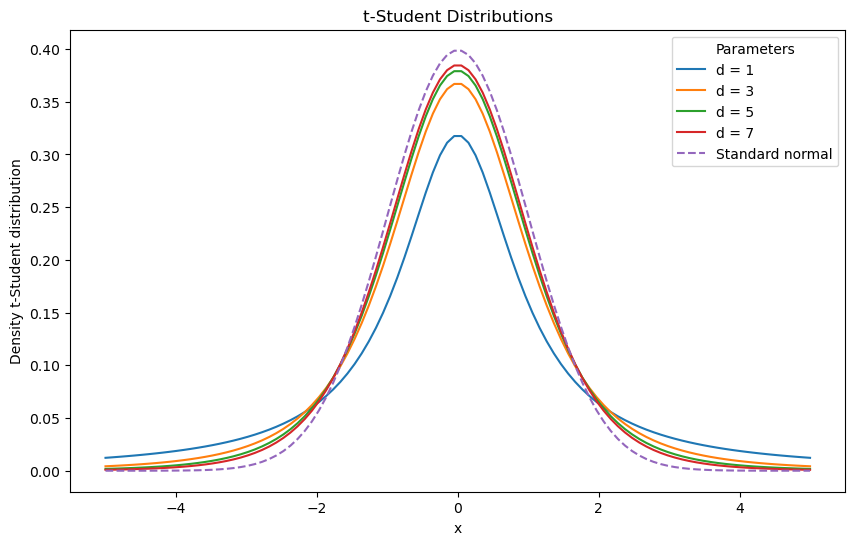

In [4]:
xs = np.linspace(-5, 5, 100)

plt.figure(figsize=(10, 6))

for d in range(1, 8, 2):
    plt.plot(xs, sp.t(df=d).pdf(xs), label=f'd = {d}')

plt.plot(xs, sp.norm(loc=0, scale=1).pdf(xs), linestyle='--', label='Standard normal')

plt.legend(title='Parameters')

plt.ylabel('Density t-Student distribution')
plt.xlabel('x')
plt.title('t-Student Distributions')
# plt.savefig("t-Student_density.pdf")
plt.show()

# Проверить являются ли две числовые переменные независимыми

In [5]:
price = np.array([19.2, 20.5, 19.7, 21.3, 20.8, 19.9, 17.8, 17.2])
sales = np.array([25.4, 14.7, 18.6, 12.4, 11.1, 15.7, 29.2, 35.2])

### 1. Проверка на нормальность

Поскольку критерий действует только для двух нормально распределенных переменных, то необходимо убедиться в том, что они распределены нормально

In [6]:
from scipy.stats import shapiro

In [7]:
# Применение теста Шапиро-Уилка
stat, p = shapiro(price)

print(f"Статистика теста: {stat}")
print(f"p-значение: {p}")

# Интерпретация
alpha = 0.05
if p > alpha:
    print("Нормальное распределение (не отвергаем H₀)")
else:
    print("Не нормальное распределение (отвергаем H₀)")

Статистика теста: 0.9359253693503262
p-значение: 0.5714866266474705
Нормальное распределение (не отвергаем H₀)


In [8]:
# Применение теста Шапиро-Уилка
stat, p = shapiro(sales)

print(f"Статистика теста: {stat}")
print(f"p-значение: {p}")

# Интерпретация
alpha = 0.05
if p > alpha:
    print("Нормальное распределение (не отвергаем H₀)")
else:
    print("Не нормальное распределение (отвергаем H₀)")

Статистика теста: 0.9082146160780988
p-значение: 0.3416625450567543
Нормальное распределение (не отвергаем H₀)


### 2. Вычислим коэффициент корреляции Пирсона

In [10]:
from scipy.stats import pearsonr

In [11]:
# Коэффициент корреляции Пирсона
corr_pearson, p_pearson = pearsonr(price, sales)
print(f"Корреляция Пирсона: {corr_pearson}, p-значение: {p_pearson}")

Корреляция Пирсона: -0.972615385860591, p-значение: 5.029179630468546e-05


In [12]:
df = len(price)-2  # Количество степеней свободы
alpha = 0.05  # Уровень значимости

### 3. Вычислим статистику и сравним с критическим значением

In [13]:
# Значение статистики
T = corr_pearson * np.sqrt(df) / np.sqrt(1 - corr_pearson ** 2)
T

-10.250433667052004

In [14]:
T_critical = sp.t.ppf(1 - alpha, df)
T_critical

1.9431802803927816

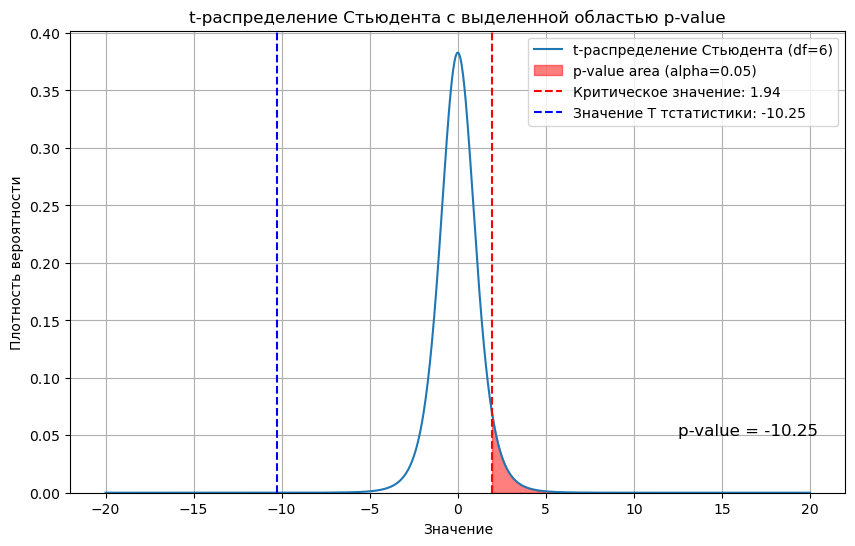

In [15]:
# Генерация значений для оси X
x = np.linspace(-20, 20, 1000)

# Вычисление плотности вероятности для t-распределения Стьюдента
y = sp.t.pdf(x, df)

# Критическое значение хи-квадрат при заданном уровне значимости
T_critical = sp.t.ppf(1 - alpha, df)

# Построение графика хи-квадрат распределения
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f't-распределение Стьюдента (df={df})')

# Закраска области p-value
x_fill = np.linspace(T_critical, 20, 1000)
y_fill = sp.t.pdf(x_fill, df)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'p-value area (alpha={alpha})')

# Настройки графика
plt.title('t-распределение Стьюдента с выделенной областью p-value')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.axvline(T_critical, color='red', linestyle='--', label=f'Критическое значение: {T_critical:.2f}')
plt.axvline(T, color='blue', linestyle='--', label=f'Значение Т тстатистики: {T:.2f}')
plt.legend()
plt.ylim(bottom=0)
plt.grid(True)
plt.text(12.5, 0.05, f'p-value = {np.round(T, 2)}', fontsize=12)
plt.show()

## Тест Манна-Уитни

Тест Манна-Уитни — это непараметрический тест, который используется для сравнения двух независимых выборок и проверки гипотезы о том, что распределения этих выборок одинаковы. Этот тест является альтернативой двухвыборочному t-тесту, когда не выполняются предположения о нормальности распределений.

In [29]:
from scipy.stats import mannwhitneyu

In [28]:
# Тест Манна-Уитни
stat, p = mannwhitneyu(price, sales)

print(f"Статистика U = {stat}")
print(f"P-значение = {p}")

# Интерпретация
alpha = 0.05
if p < alpha:
    print("Нулевая гипотеза отвергается. Распределения различны.")
else:
    print("Нулевая гипотеза не отвергается. Распределения одинаковы.")

Статистика U = 38.0
P-значение = 0.5737373737373737
Нулевая гипотеза не отвергается. Распределения одинаковы.
